<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/Hierarchical_Clustering_Lab_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  #helps in mathematical operations
import matplotlib.pyplot as plt #helps in plotting of graph
import pandas as pd #helps in making dataframes and importing csv files

In [2]:
from google.colab import drive #to import google drive data

In [3]:
drive.mount('/content/drive') # mount the drive on colab using authentication

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Clustering"

/content/drive/My Drive/Colab Notebooks/Clustering


In [5]:
#Reading the csv file
dataset=pd.read_csv("Instagram visits clustering.csv")
print(dataset)

      User ID  Instagram visit score  Spending_rank(0 to 100)
0           0                     63                24.050708
1           1                     61                25.223290
2           2                    104                18.528245
3           3                     82                86.890232
4           4                     14                31.492397
...       ...                    ...                      ...
2595     2595                     25                25.745908
2596     2596                     52                 9.275066
2597     2597                    100                84.999487
2598     2598                     87                20.530806
2599     2599                     34                76.388622

[2600 rows x 3 columns]


In [6]:
X = dataset.iloc[:,1:3].values

In [7]:
X

array([[ 63.        ,  24.05070845],
       [ 61.        ,  25.22329005],
       [104.        ,  18.52824526],
       ...,
       [100.        ,  84.99948736],
       [ 87.        ,  20.53080557],
       [ 34.        ,  76.38862194]])

In [8]:
X.shape

(2600, 2)

In [9]:
import scipy.cluster.hierarchy as sch

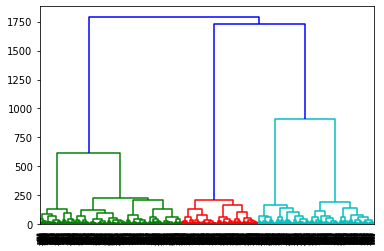

In [11]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
hc =  AgglomerativeClustering(n_clusters=5,linkage='ward')

In [14]:
y_hc = hc.fit_predict(X)

In [15]:
y_hc

array([4, 4, 0, ..., 2, 0, 3])

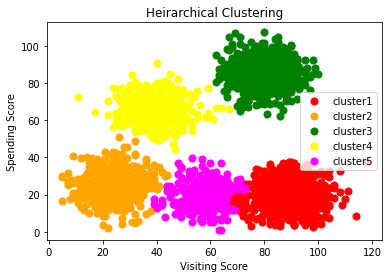

In [16]:
#visualize the Cluster
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='red',label='cluster1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='orange',label='cluster2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='green',label='cluster3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='yellow',label='cluster4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='magenta',label='cluster5')
plt.title('Heirarchical Clustering')
plt.xlabel('Visiting Score')
plt.ylabel('Spending Score')
plt.legend()

In [17]:
#Verifying with KMeans
from sklearn.cluster import KMeans

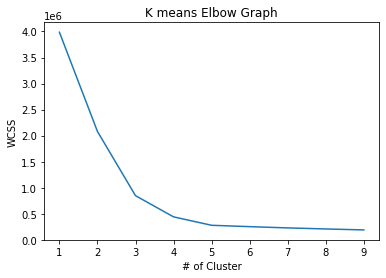

In [18]:
#wcss = within cluster sum of squares
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)        #residual values which we are having.
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

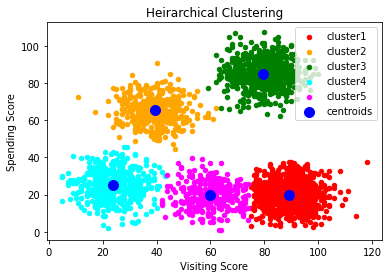

In [21]:
#visualize the Cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=20,c='red',label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=20,c='orange',label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=20,c='green',label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=20,c='cyan',label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=20,c='magenta',label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='centroids')

plt.title('Heirarchical Clustering')
plt.xlabel('Visiting Score')
plt.ylabel('Spending Score')
plt.legend()  
plt.show()